# Exercise 3
# Q1

We consider the discrete-time LTI system  
$$
x_{n+1}=Ax_n+Bu_n,\quad n=0,\dots,N-1,\qquad x_0=\begin{bmatrix}0\\0\\0\\0\\0\\0\end{bmatrix}\in\mathbb{R}^6
$$
and the objective  
$$
\min_{\{x_n,u_n\}} \;\; \frac{1}{2}\sum_{n=0}^{N}\Big((x_n-x_d)^\top Q(x_n-x_d) \;+\; \sum_{n=0}^{N-1} u_n^\top R u_n\Big),
$$

Introduce Lagrange multipliers $\lambda_{n+1}\in\mathbb{R}^6$ for the dynamics (with $x_0$ fixed).  
The Lagrangian is
$$
\mathcal{L}=\frac{1}{2}\sum_{n=0}^{N}\Big((x_n-x_d)^\top Q(x_n-x_d) \;+\; \sum_{n=0}^{N-1} u_n^\top R u_n\Big)
+\sum_{n=0}^{N-1}\Big(\lambda_{n+1}^\top(Ax_n+Bu_n-x_{n+1})\Big).
$$

**KKT conditions:**

**(1) Primal feasibility**  
$$
x_{n+1}=Ax_n+Bu_n,\; n=0,\dots,N-1,\qquad x_0=\begin{bmatrix}0\\0\\0\\0\\0\\0\end{bmatrix}\in\mathbb{R}^6 .
$$

**(2) Stationarity**  
- Take the partial derivative of the Lagrangian ($\mathcal{L}$) with respect to $u_n$ $(n=0,\dots,N-1)$  
$$
\frac{\partial\mathcal{L}}{\partial u_n}=Ru_n+B^\top\lambda_{n+1}=0
\;\Rightarrow\;
\boxed{\,u_n=-R^{-1}B^\top\lambda_{n+1}\,},\; n=0,\dots,N-1.
$$
- Take the partial derivative of the Lagrangian ($\mathcal{L}$) with respect to $u_N$  
$$
\frac{\partial\mathcal{L}}{\partial u_N}=Ru_n=0
\;\Rightarrow\;
\boxed{\,u_N=0\,}.
$$
- Take the partial derivative of the Lagrangian ($\mathcal{L}$) with respect to $x_n$ $(n=0,\dots,N-1)$ 
$$
\frac{\partial\mathcal{L}}{\partial x_n}=Q(x_n-x_d)+A^\top\lambda_{n+1}-\lambda_n=0
\;\Rightarrow\;
\boxed{\,\lambda_n=Q(x_n-x_d)+A^\top\lambda_{n+1}},\; n=0,\dots,N-1.
$$
- Take the partial derivative of the Lagrangian ($\mathcal{L}$) with respect to $x_N$  
$$
\frac{\partial\mathcal{L}}{\partial x_N}=Q(x_N-x_d)-\lambda_N=0
\;\Rightarrow\;
\boxed{\,\lambda_N=Q(x_N-x_d)\,},\qquad
$$
**(3) Dual feasibility & complementary slackness**  
Only equality constraints are present, so no inequality multipliers or complementarity terms.

Arranged as follows
$$
\begin{cases}
x_{n+1}=Ax_n+Bu_n,\;\qquad n=0,\dots,N-1\\
x_0=\begin{bmatrix}0\\0\\0\\0\\0\\0\end{bmatrix},\\
u_n=-R^{-1}B^\top\lambda_{n+1},\;\qquad n=0,\dots,N-1,\\
u_N=0\qquad (Assuming \quad R \quad is \quad invertible)\\
\lambda_n=Q(x_n-x_d)+A^\top\lambda_{n+1}\;\qquad n=0,\dots,N-1,\\
\lambda_N=Q(x_N-x_d)\\
\end{cases}
$$
# Q2

In [72]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mp
from matplotlib.animation import Animation, FuncAnimation
import IPython

# definition of the matrices and example of control
m = 0.5
I = 0.1
r = 0.15
g = 9.81
dt = 0.01
length = 0.15

A = np.eye(6)
A[0,1] = dt
A[1,4] = -g * dt
A[2,3] = dt
A[4,5] = dt

B = np.zeros((6,2))
B[3,0] = dt/m
B[3,1] = dt/m
B[5,0] = length * dt/I
B[5,1] = -length * dt/I



def animate_robot(x0, u, goal):
    """
    This function makes an animation showing the behavior of the quadrotor
    takes as input the result of a simulation (with dt=0.01s)
    """

    assert(u.shape[0]==2)
    assert(x0.shape[0]==6)
    N = u.shape[1] + 1
    x = np.zeros((6,N))
    x[:,0] = x0[:,0]
    for i in range(N-1):
        x[:,i+1] = A @ x[:,i] + B @ u[:,i]
        
    min_dt = 0.1
    if(dt < min_dt):
        steps = int(min_dt/dt)
        use_dt = int(np.round(min_dt * 1000))
    else:
        steps = 1
        use_dt = int(np.round(dt * 1000))

    #what we need to plot
    plotx = x[:,::steps]
    plotx = plotx[:,:-1]
    plotu = u[:,::steps]

    fig = mp.figure.Figure(figsize=[6,6])
    mp.backends.backend_agg.FigureCanvasAgg(fig)
    ax = fig.add_subplot(111, autoscale_on=False, xlim=[-4,4], ylim=[-4,4])
    ax.grid()

    list_of_lines = []

    #create the robot
    # the main frame
    line, = ax.plot([], [], 'k', lw=6)
    list_of_lines.append(line)
    # the left propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the right propeller
    line, = ax.plot([], [], 'b', lw=4)
    list_of_lines.append(line)
    # the left thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)
    # the right thrust
    line, = ax.plot([], [], 'r', lw=1)
    list_of_lines.append(line)
    # the goal
    ax.plot([goal[0]], [goal[1]], 'og', lw=2)
    
    def _animate(i):
        for l in list_of_lines: #reset all lines
            l.set_data([],[])

        theta = plotx[4,i]
        x = plotx[0,i]
        y = plotx[2,i]
        trans = np.array([[x,x],[y,y]])
        rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

        main_frame = np.array([[-length, length], [0,0]])
        main_frame = rot @ main_frame + trans 
        
        left_propeller = np.array([[-1.3 * length, -0.7*length], [0.1,0.1]])
        left_propeller = rot @ left_propeller + trans
        
        right_propeller = np.array([[1.3 * length, 0.7*length], [0.1,0.1]])
        right_propeller = rot @ right_propeller + trans
        
        left_thrust = np.array([[length, length], [0.1, 0.1+plotu[0,i]*0.04]])
        left_thrust = rot @ left_thrust + trans
        
        right_thrust = np.array([[-length, -length], [0.1, 0.1+plotu[1,i]*0.04]])
        right_thrust = rot @ right_thrust + trans

        list_of_lines[0].set_data(main_frame[0,:], main_frame[1,:])
        list_of_lines[1].set_data(left_propeller[0,:], left_propeller[1,:])
        list_of_lines[2].set_data(right_propeller[0,:], right_propeller[1,:])
        list_of_lines[3].set_data(left_thrust[0,:], left_thrust[1,:])
        list_of_lines[4].set_data(right_thrust[0,:], right_thrust[1,:])

        return list_of_lines

    def _init():
        return _animate(0)


    ani = FuncAnimation(fig, _animate, np.arange(0, len(plotx[0,:])),
        interval=use_dt, blit=True, init_func=_init)
    plt.close(fig)
    plt.close(ani._fig)
    IPython.display.display_html(IPython.core.display.HTML(ani.to_html5_video()))

In [73]:
# === Step 1: horizon & cost weights ===
import numpy as np
import matplotlib.pyplot as plt

# 为了先跑通，你可以先用小一点的 N，比如 200；确认无误后再改回 500
N = 500
nx, nu = A.shape[0], B.shape[1]
x0 = np.zeros((nx, 1))
x_des = np.array([-3, 0, 3, 0, 0, 0])

Q = np.diag([12, 1.5, 12, 1.5, 8, 2.0]).astype(float)
R = 0.1 * np.eye(2)            # 对称的 R，更均衡地使用两侧推力




In [74]:
# === Step 2: indexing helpers for y = [x1..xN, u0..u_{N-1}, lambda1..lambdaN] ===
x_block = nx * N
u_block = nu * N
lam_block = nx * N
tot = x_block + u_block + lam_block   # = (6+2+6)N = 14N

def xs(k):   # x_k, k = 1..N
    return slice(nx*(k-1), nx*k)

def us(k):   # u_k, k = 0..N-1
    base = x_block
    return slice(base + nu*k, base + nu*(k+1))

def ls(k):   # lambda_k, k = 1..N
    base = x_block + u_block
    return slice(base + nx*(k-1), base + nx*k)


In [75]:
# === Step 3: assemble KKT system K y = b ===
K = np.zeros((tot, tot), dtype=float)
b = np.zeros(tot, dtype=float)

row = 0

# (I) stationarity wrt x_n, n=1..N-1:  Q(x_n - x_des) + A^T lambda_{n+1} - lambda_n = 0
for n in range(1, N):
    rs = slice(row, row+nx)
    K[rs, xs(n)] += Q
    K[rs, ls(n+1)] += A.T
    K[rs, ls(n)] += -np.eye(nx)
    b[rs] = Q @ x_des
    row += nx

# terminal: x_N:  Q(x_N - x_des) - lambda_N = 0
rs = slice(row, row+nx)
K[rs, xs(N)] += Q
K[rs, ls(N)] += -np.eye(nx)
b[rs] = Q @ x_des
row += nx

# (II) stationarity wrt u_n, n=0..N-1:  R u_n + B^T lambda_{n+1} = 0
for n in range(0, N):
    rs = slice(row, row+nu)
    K[rs, us(n)] += R
    K[rs, ls(n+1)] += B.T
    # rhs = 0
    row += nu

# (III) dynamics: x_{n+1} - A x_n - B u_n = 0
# n = 0: x1 - B u0 = A x0   (x0 已知，进 b)
rs = slice(row, row+nx)
K[rs, xs(1)] += np.eye(nx)
K[rs, us(0)] += -B
b[rs] = (A @ x0[:, 0])
row += nx

# n = 1..N-1: x_{n+1} - A x_n - B u_n = 0
for n in range(1, N):
    rs = slice(row, row+nx)
    K[rs, xs(n+1)] += np.eye(nx)
    K[rs, xs(n)] += -A
    K[rs, us(n)] += -B
    # rhs = 0
    row += nx

assert row == tot, f"assembled rows {row} != tot {tot}"


In [76]:
# === Step 4: solve and unpack ===
y = np.linalg.solve(K, b)

X = np.zeros((nx, N+1))
U = np.zeros((nu, N))
X[:, 0] = x0[:, 0]
for k in range(1, N+1):
    X[:, k] = y[xs(k)]
for k in range(0, N):
    U[:, k] = y[us(k)]


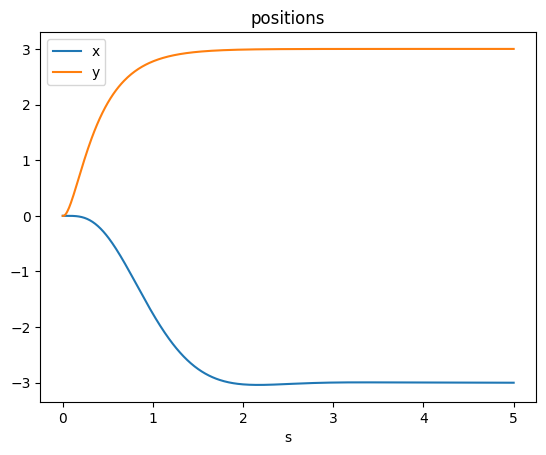

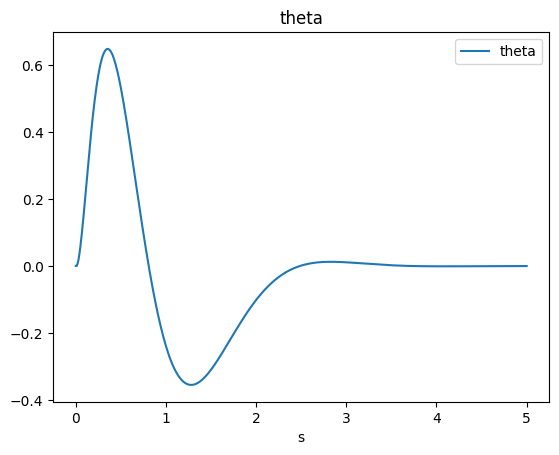

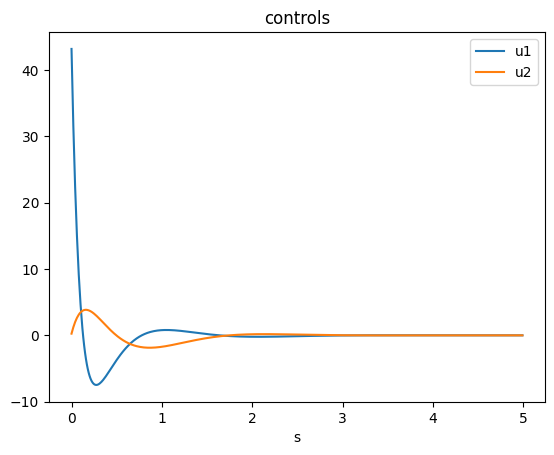

In [77]:
# === Step 5: quick plots ===
t  = np.arange(N+1) * dt
tt = np.arange(N)   * dt

plt.figure(); plt.plot(t, X[0], label='x'); plt.plot(t, X[2], label='y'); plt.legend(); plt.title('positions'); plt.xlabel('s')
plt.figure(); plt.plot(t, X[4], label='theta'); plt.legend(); plt.title('theta'); plt.xlabel('s')
plt.figure(); plt.plot(tt, U[0], label='u1'); plt.plot(tt, U[1], label='u2'); plt.legend(); plt.title('controls'); plt.xlabel('s')
plt.show()


In [78]:
# === Step 6: animate (optional) ===
animate_robot(x0, U, goal=[-3, 3])


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALU5tZGF0AAACrgYF//+q
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMg
bG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRl
cmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJf
cHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9
MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3Jl
ZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAu
NjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAR
DGWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAFHh7Xrjd2DW0nQAAAawAOk
I1P/T9142nEA0EvtHqXzsuamUFIZSwxCA2KdK9gGiLwQ+UaHGKXushqSue2ZF9TSqIzQEB+Suz6P
kYW3aK3OpCt93eWmYkVdr4w0MrHB4FQkEshT/eeeQAW5H7BIZLVHdtoQk2aQm2/1CQrM8vUPyB5G
tQcfqIQyY95leoRT037B1neltayvcKYqow9bpAA+65ttcefuh5E+lxt3HY8Rvc+O/QtAi9YlNLpi
yFvFv/Bo6yYS0C4ViI+6CYcPRRzp0FI5mnG2sClhsojwI8oh/L9OtfZt+tSkSEdDNvCKsoQiVRM1
0hOyRU4/eWNebfjknxw/H8mtQnUI44CxNhCS+DQx3yhidL6+c/2WFhqCNS/VVrFUhfLiX2r9H/mV
p8vDEgjMXSL2LNazwEKaZn5DY9MuuG9WAgnpEdQtmmQ0v8But5S2o+K3wGi6L7OXu6DxniZ1C+lP
dNMUKL8a3SEAvvgjthj/y6SMf5UZhARvZef4NJ97ex8AY82/CxwZF3T7+SQZ6555aYafFTUdHOKC
7B8Gi7uMYOAqfpOjMKNzeg1gQndnUCIEL8cwLjq32NsLILsuDYHbdCkqiSYKt0tK4rvwdH1b8V7B
tQyHwWTooK6GJ0bQRg3x+BrDcDq43elihPo6zRkU8pczqhmfOdouYsHp7PEjkd+YWcMIAdmdJf46
xgZmJW77zyo5JdKyiwnCfqeZqZ2PpVfG9gBYE2Ejvszw/5H+NNSvByHeplyJSIeMT4qi86jhCvRI
+IsqG47Tt+5Z8UxgFazxngAqEDMPAdIgzkd3g+6NDdxR8N7x7EsGKGEkhd0ZLq8mv2bWGhkZrtQY
I1BxIBnFFVDHoJl1HC4bwj6RqCjelzP+R9n2ezNnUlFnqs9721hhr9AUrFcLs6BTbk1XUE7e0Vn6
snZStXjA68WdYvaBZZ9Klezqz2G9eosiMYf048+Z2EdT1k5/9jXUtD5uWlZNsiqBJlk1QL+woQhh
v4cqGHMLG+PkxqpG2qYzkw1/3b75SZorbf6JXpspYqXup3pBIdVexdlSUzQf/Zn/Tqc8MAAABaA/
W7f8JGlSx8YP0RvJovkqTTTC6CQ1/84KpVbbRDCOTStQ3eVtu2y1kOPUHIXlI5GabOD9B+GfC+ZN
4+IDNlgcy7RjHWyUEZL7qxHEwqXRkFeyXuGYsTilKB8txr+vf7e0EXsxy7eCva2mLYgH3zHNmqY3
0Jr6OFbgSKn+u8Z/VzCgH+Ygb08dbmKSFDoDegofMqYsrxYQ3XNiaYx3xGrkPKXvrrRe0YFclG0D
y3H4VEvgOq3HtJDs3bHWGKicJOW3ANQd6Lyqg5syjDk/O4doY3NlvlKU2OKdlOElcp/B4zEWunmn
9pkIbBPfQQGeQytv0YBgXWE7kvd/7jZxeJPpj8DqV/5l7BFD80/tLfMlkkTyxWnoHMRAd1Hmuv0M
EJQ02uwSftFyZ0unSDMt/Vag+aZgCoJkOcWzKdJTR6Eqw33xe5IFdh6mg/zS926vJZX7szzlwqxF
nG2pdVBb5AIzts3g5EkTD1D/PWyOlcGVSjp1pHVPC6Bug0vmEQtBR+yVAjcAAAMAAkWvvuz5UFQU
szjQAAdjAfSInIol6twrSyDV6XKKZ415rI/LYVpktcDcQogDo+S6qfQgT8vZyyn1Bq9stiMKbJlp
a5Qk83I7c/CNZn+TgeqgGo84IUZgWxz8XOCl2RsWWyVDP9liTB0X1pqcIhzL2508jljaSMKweVXd
io/iP9NPjE5Qlj/kQFwrKgtwzgOH/+ePxWjkfcYswsmSqIzTZKheKclCuc5+7M9DA8riEV0xq4NP
6qLC18/InUnj2WwpVi3MWy+Pd50sTt9jk4z//SWew3m79x/B8T50adZb5bIcxOo/z9mxNfMeEtOR
/1rxgGtamrAyrMhYGehMvs3CxXRM99LZ659T/V3uaWta2DRNk/JzBQOf5+ev2pnXtN3jbWlYcxAE
H/mmnoGfmOKmD4c4JiJqAAdor/+/0rQKGs4TNiyd2U/ROLq8mZ9jUHaZ3Pop6ncvylReiA0wpHrk
kTc3lxkgrq05BsBf4Oy48mcDZ340atRrzIjLiBarU1ioDNkeD+A+aW32RvpfOgCRMjdE9+X4iv85
9e+zg6GP1A5U2A1J1Lv/BfDQDQBgdNk4Ev67L1dZJxvJ3nmQRYTtFgYrIffBHP9OX0DMWVHu4Tr1
PCS1xOE/lNVkkZv4jTqk3TTq04+vd9iYXJdneDv9fdE2gIUD1a2rvPqcVobgYUjuxq64YDFn0aqJ
AFX9npagKGFRI/5vr6vF5rQs5iR//MN22wvLk2uAeyP/s6d0xYThvklM77BnhudatvgYsr9G1pfL
ZXz/s57+AJFxtRMEt48o5XQJ7iusSsw0JC2BnoJV+idz7hZIVvffgiFdQM3R7WRVT/6t7Okf7zgq
O5cnT8vHQmeJrlXvGefUqFW//YJ/Tq9jnOve+EcdCyhAsiDw8PaeBxR9+5vXso4NOEXQklwqRRbz
MOmLEdc8nqqAN0UdL50OXFHwHYQbXcybXnJPenaaPhz3O63iaz46JjoHKqnf+AG466Iztu9p2kYs
PN6j0C+w62u5OqN3Stvqv7zGRCni6O54xJ8wTJ3XooRywYE5rJ4Iz1A0WbPdw25xIFkq4uVjDKti
6ZlHHNhWVKyQ6p4Ivg6n2uxMkolUVeWA7w/9TvO7Ab1PTRZ9kmQPnI/fQRGsPWIa+1qKc1PPCW6A
+tQj8OorLK2cPMY2GJ85ZPW52PnKBMwS8QegHkVNg3d4Bcd9n38M4vq1CaCONZrPojmHAATNK8CX
5KXlYwnOAACbyYmWxu2BT